In [5]:
import numpy as np
import scipy
from scipy.stats import multivariate_normal

In [4]:
multivariate_normal.pdf(\)

AttributeError: module 'scipy' has no attribute 'stats'

In [5]:
A, B = np.genfromtxt("task2_points", usecols=range(1,9))

In [6]:
A

array([3.5 , 3.5 , 8.5 , 3.75, 8.5 , 8.75, 1.5 , 6.  ])

In [7]:
B

array([4.75, 5.  , 6.25, 5.  , 6.25, 6.  , 4.75, 6.  ])

In [32]:
pointsA = list(zip(A[::2],A[1::2]))

In [33]:
pointsA

[(1.78269, 1.41994),
 (2.39558, 1.21721),
 (2.50196, 1.92164),
 (2.09783, 2.19345)]

In [34]:
pointsB = list(zip(B[::2],B[1::2]))

In [35]:
pointsB

[(-0.500439, 0.936184),
 (2.7479, 6.90028),
 (3.39415, 2.08816),
 (6.39042, -1.08549)]

In [7]:
def step(x):
    return 1 * (x > 0)

In [166]:
def task2_hNeuron(W, X):
    bias = W[0]
    W = np.delete(W, 0, 0)
    # W.T shape == (1 x D)
    # X.T shape == (D x N)
    Y = (W.T @ X) + bias
    # Y shape == (N x 1)
    return step(Y.T)

In [167]:
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

In [168]:
def task2_sNeuron(W, X):
    bias = W[0]
    W = np.delete(W, 0, 0)
    # W.T shape == (1 x D)
    Y = (W.T @ X) + bias
    # a shape == (1 x N)
    print(Y.shape)
    return sigmoid(Y.T)

In [169]:
def task2_hNN_A(X):
    # Weights for first layer
    W1 = np.asanyarray([-3.325, -0.05, 1])
    W2 = np.asanyarray([8.5, -1, 0])
    W3 = np.asanyarray([303.0/56, 11.0/28, -1])
    W4 = np.asanyarray([-7.875, 1.25, 1])

    # Outputs from first layer
    Y1 = task2_hNeuron(W1, X)
    Y2 = task2_hNeuron(W2, X)
    Y3 = task2_hNeuron(W3, X)
    Y4 = task2_hNeuron(W4, X)
    
    #  Weights for second layer
    W5 = np.array([-3.5, 1, 1, 1, 1])

    X_out = np.vstack((Y1,Y2,Y3,Y4))

    Y = task2_hNeuron(W5, X_out)

    return Y

In [170]:
X = np.asanyarray([[3.5, 3.5], [8.5,3.75],[8.5, 8.75],[1.5,6]])
print(X)

[[3.5  3.5 ]
 [8.5  3.75]
 [8.5  8.75]
 [1.5  6.  ]]


In [171]:
task2_hNN_A(X.T)

(4,)
(4,)
(4,)
(4,)
(4,)


array([0, 0, 0, 0])

In [172]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

(1000000,)
(1000000,)
(1000000,)
(1000000,)
(1000000,)


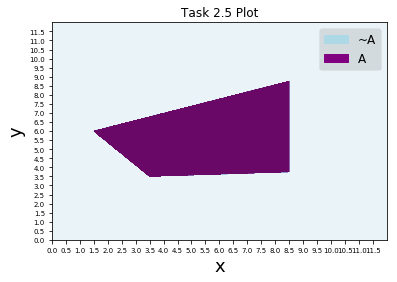

In [173]:
# Generate points between 0 and 10 to classify
x_points = np.linspace(0,12, 1000)
y_points = np.linspace(0,12,1000)
xx, yy = np.meshgrid(x_points, y_points)
gridX = np.vstack((xx.ravel(), yy.ravel()))


# Classify the points and reshape the result to fit the plot function
data = task2_hNN_A(gridX)
data = data.reshape((x_points.shape[0], y_points.shape[0]))
# Setup the plot title and axis
plt.title('Task 2.5 Plot')
plt.xticks(np.arange(0, 12, 0.5), fontsize=7)
plt.yticks(np.arange(0, 12, 0.5),fontsize=7)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)

# Setup legend

blue_patch_legend = mpatches.Patch(color='lightblue', label='~A')
purple_patch_legend = mpatches.Patch(color='purple', label='A')
plt.legend(loc='best', fancybox=True, framealpha=0.1, handles=[blue_patch_legend, purple_patch_legend], facecolor='black', fontsize=12)

# Plot data and show result
plt.contourf(xx, yy, data, cmap=cm.BuPu)
plt.show()